**Observations Based on the Data**

Capomulin and Ramicane have a relatively small interquartile range (for average tumor volume) while Ceftamin and Infubinol have a relatively large interquartile range. This suggest Capomulin and Ramicane had a more consistent set of data than Ceftamin and Infubinal (which had a wide range of average tumor volume)
Mouse b128 showed a consist (although not perfect) decline in tumor volume over time on the Capomulin drug regimen
Mouse weight and average tumor volume is highly correlated with a correlation coefficient of 0.8419363424694717

In [510]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [511]:
#Reading in both data sets
data1_path = 'Resources/mouse_metadata.csv'
data2_path = 'Resources/study_results.csv'

data1 = pd.read_csv(data1_path)
data2 = pd.read_csv(data2_path)

In [512]:
#merging the data sets
df = pd.merge(data1,data2, on='Mouse ID')
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [513]:
print(len(pd.unique(df['Mouse ID'])))

249


In [514]:
#cleaning up the duplicate time point data for each mouse
cleaned_df = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [515]:
#checking to make sure there are the same amount of mouse in cleaned data set
print(len(pd.unique(cleaned_df['Mouse ID'])))

249


In [516]:
#Summary Stats of tumor volume for each drug Regimen
placeholder = cleaned_df.groupby('Drug Regimen')
a = placeholder['Tumor Volume (mm3)'].mean()
b = placeholder['Tumor Volume (mm3)'].median()
c = placeholder['Tumor Volume (mm3)'].std()
d = placeholder['Tumor Volume (mm3)'].sem()
drug_mean = a.to_frame()
drug_median = b.to_frame()
drug_std = c.to_frame()
drug_sem = d.to_frame()

Drug_Regimen_SumStats_df = pd.concat([drug_mean,drug_median,drug_std,drug_sem],axis=1)
Drug_Regimen_SumStats_df.columns = ['Mean Tumor Volume (mm3)','Median Tumor Volume (mm3)', 'Standard Deviation','Standard Error of the Mean']
Drug_Regimen_SumStats_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


<function matplotlib.pyplot.show(close=None, block=None)>

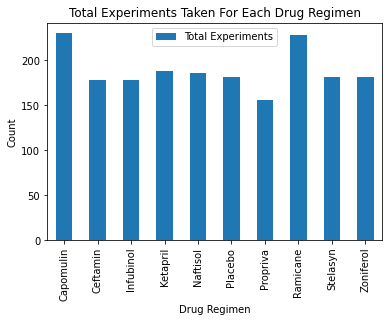

In [517]:
#Using DataFrame.plot() to create a bar plot of the total number of measurements taken for each drug regimen
placeholder.count().plot.bar(y = 'Timepoint',title = 'Total Experiments Taken For Each Drug Regimen',ylabel='Count')
plt.legend(['Total Experiments'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

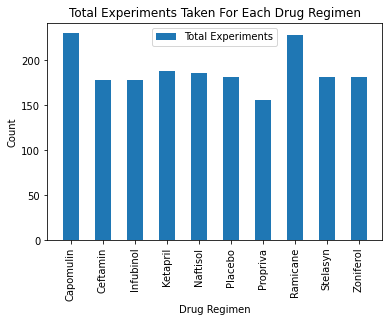

In [518]:
#Using Matplotlib's pyplot to create a bar plot of the total number of measurements taken for each drug regimen
fig = plt.figure()
t = placeholder['Timepoint'].count()
x = np.arange(len(t))
labels = ['Capomulin','Ceftamin', 'Infubinol', 'Ketapril','Naftisol','Placebo', 
       'Propriva','Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(x,t,width = 0.5)
plt.xticks(x,labels,rotation=90)
plt.title('Total Experiments Taken For Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.legend(labels=['Total Experiments'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

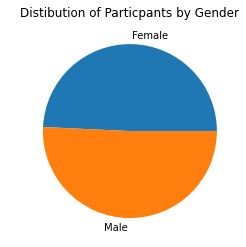

In [519]:
#Using DataFrame.plot() to shoe the distribution of gender of mice in the study
placeholder3 = cleaned_df.groupby('Sex')['Timepoint'].count()
placeholder3.plot.pie(ylabel = ' ', title = 'Distibution of Particpants by Gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

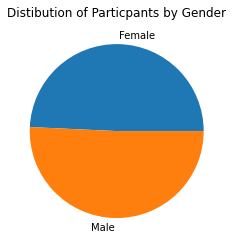

In [520]:
#Using Matplotlib's pyplot to shoe the distribution of gender of mice in the study
fig = plt.figure()
x = np.array(placeholder3)
labels = ['Female','Male']
plt.pie(x,labels=labels)
plt.title('Distibution of Particpants by Gender')
plt.show

In [521]:
#Calculating final tumor volume of each mouse across four of the most promising treatment regimens
sorted_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
sorted_df = sorted_df.groupby('Drug Regimen')

capomulin_sum = sorted_df.get_group('Capomulin').groupby('Mouse ID').sum()
Capomulin = capomulin_sum['Tumor Volume (mm3)']
ramicane_sum = sorted_df.get_group('Ramicane').groupby('Mouse ID').sum()
Ramicane= ramicane_sum['Tumor Volume (mm3)']
infubinol_sum = sorted_df.get_group('Infubinol').groupby('Mouse ID').sum()
Infubinol = infubinol_sum['Tumor Volume (mm3)']
ceftamin_sum = sorted_df.get_group('Ceftamin').groupby('Mouse ID').sum()
Ceftamin = ceftamin_sum['Tumor Volume (mm3)']
drug_dict = {'Capomulin': Capomulin, 'Ramicane': Ramicane, 'Infubinol': Infubinol, 'Ceftamin' : Ceftamin}

#Calculating quartiles and IQR
for key, value in drug_dict.items():
    quartile = value.quantile([0.25,0.5,0.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    if lower_bound <=0:
        lower_bound = lowerq
    upper_bound = upperq + (1.5*iqr)
    
    print(f'The lower and upper quartile for total tumor volume by mouse for {key} respectively is {lowerq} mm3 and {upperq} mm3')
    print(f'The interquartile range of volumes is: {iqr}')
    print(f'The median total tumer volume by mouse of {key} is {quartile[0.5]} mm3')
    print(f'Values that fall below {lower_bound} mm3 and above {upper_bound} mm3 may be outlliers\n')

The lower and upper quartile for total tumor volume by mouse for Capomulin respectively is 361.82039562 mm3 and 425.07261035000005 mm3
The interquartile range of volumes is: 63.25221473000005
The median total tumer volume by mouse of Capomulin is 398.87495191 mm3
Values that fall below 266.94207352499996 mm3 and above 519.9509324450001 mm3 may be outlliers

The lower and upper quartile for total tumor volume by mouse for Ramicane respectively is 360.50156185 mm3 and 407.0138542699999 mm3
The interquartile range of volumes is: 46.51229241999994
The median total tumer volume by mouse of Ramicane is 388.07794580999996 mm3
Values that fall below 290.73312322000004 mm3 and above 476.7822928999998 mm3 may be outlliers

The lower and upper quartile for total tumor volume by mouse for Infubinol respectively is 250.34313264000002 mm3 and 539.7958369400001 mm3
The interquartile range of volumes is: 289.45270430000005
The median total tumer volume by mouse of Infubinol is 368.77146924 mm3
Values 

<function matplotlib.pyplot.show(close=None, block=None)>

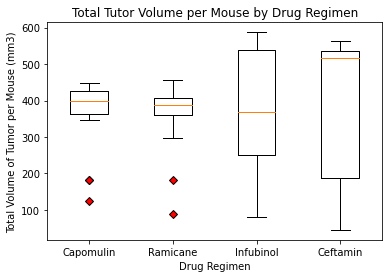

In [522]:
#Using Matplotlib to create box and whisker plots of final tumor volume
fig = plt.figure()
drug_list = [Capomulin, Ramicane, Infubinol, Ceftamin]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
red_diamond = dict(markerfacecolor='r',marker='D')
plt.boxplot(drug_list,labels=labels,flierprops=red_diamond)
plt.title('Total Tutor Volume per Mouse by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Volume of Tumor per Mouse (mm3)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

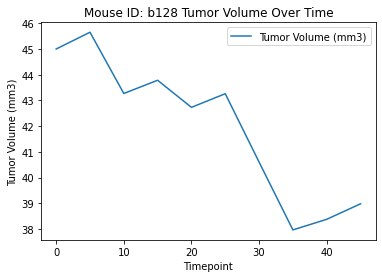

In [523]:
#A line plot of a mouse's tumor volume that was treated with Capomulin 
z = cleaned_df.groupby('Mouse ID')
y = z.get_group('b128')
y.plot.line(x='Timepoint',y='Tumor Volume (mm3)',title = 'Mouse ID: b128 Tumor Volume Over Time', ylabel = 'Tumor Volume (mm3)')
plt.show

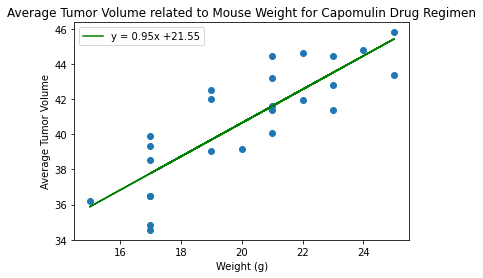

In [524]:
#Scatter plot of mouse weight versus average tumor volume
p = sorted_df.get_group('Capomulin').groupby('Mouse ID').mean()
x_values = p['Weight (g)']
y_values = p['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

fig = plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'g-', label = line_eq)
plt.legend()
plt.title('Average Tumor Volume related to Mouse Weight for Capomulin Drug Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

In [525]:
#Calculating correlation coeffient
correlation = st.pearsonr(x_values,y_values)
print(f'The correlation coeffienct for the mouse weight and tumor volume is {correlation[0]}')

The correlation coeffienct for the mouse weight and tumor volume is 0.8419363424694717
